# Conociendo las bases de Test

Cargamos las bases de datos de test para conocer su estructura y contenido. Realizar un análisis exploratorio de datos (EDA) para identificar patrones, valores faltantes y posibles problemas de calidad de datos.

In [2]:
# Cargamos las bases de datos de test
import pandas as pd
test_labels = pd.read_csv('../data/raw/test/test_labels.csv')
test_operational_readouts = pd.read_csv('../data/raw/test/test_operational_readouts.csv')
test_specifications = pd.read_csv('../data/raw/test/test_specifications.csv')

### Test Labels

In [12]:
# Vamos a comenzar con test labels
test_labels.head()

,vehicle_id,class_label
0,1,0
1,6,0
2,7,0
3,9,0
4,11,0


In [13]:
# Hagamos un análisis exploratorio de datos (EDA) para identificar patrones, valores faltantes y posibles problemas de calidad de datos.
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   vehicle_id   5045 non-null   int64
 1   class_label  5045 non-null   int64
dtypes: int64(2)
memory usage: 79.0 KB


In [14]:
test_labels.describe()

,vehicle_id,class_label
count,5045.000000,5045.000000
mean,16803.188702,0.083053
std,9761.914799,0.523099
min,1.000000,0.000000
25%,8300.000000,0.000000
50%,16755.000000,0.000000
75%,25299.000000,0.000000
max,33638.000000,4.000000


In [15]:
# ver los valores unicos de 'class_label' y mostrarlos en orden ascendente
test_labels['class_label'].value_counts().sort_index() 

class_label
0    4903
1      26
2      15
3      41
4      60
Name: count, dtype: int64

Nos podemos dar cuenta que la base de datos cuenta con 5045 filas y 2 columnas. No hay valores nulos en ninguna de las columnas. Ambas son de tipo entero (int64).
Bien ahora que tenemos esta información sacada de las estadisticas descriptivas. Tambien nos podemos dar cuenta que en la columna 'class_label' hay 5 variables categoricas (0, 1, 2, 3, 4) y la cantidad de registros que hay en cada una de ellas, siendo la clase 0 la que mas registros tiene. 

Vamos a identificar toda esta informacion graficamente.

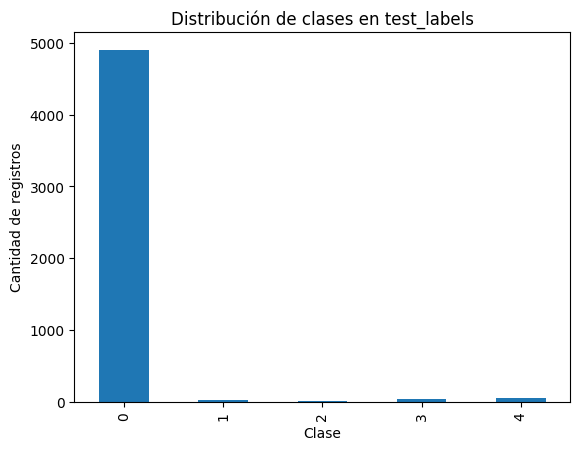

In [16]:
# grafica para ver la distribucion de las clases en 'class_label'
import matplotlib.pyplot as plt
test_labels['class_label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de clases en test_labels')
plt.xlabel('Clase')
plt.ylabel('Cantidad de registros')
plt.show()

In [17]:
#cuantos registros unicos hay de 'vehicle_id'
test_labels['vehicle_id'].nunique()

5045

Esto nos da a entender que en la columan 'vehicle_id' todos y cada uno de los registros son unicos, es decir no hay vehiculos repetidos en la base de datos de test.

In [22]:
# esta grafica al no tener valores nulos no necesita limpieza, mas sin embargo, es importante documentar estos hallazgos para futuras referencias.
# vamos a guardar esta base de datos en nuestra carpeta de datos procesados
# aunque no la modificamos la guardamos para tener todo en un solo lugar
test_labels.to_csv('../data/processed/test/test_labels_clean.csv', index=False)

### Test Operational Readouts

In [3]:
# Ya tenemos la data cargada
test_operational_readouts.head()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,1,4.4,94410.0,7982.0,3115020.0,2625.0,1304.0,366624.0,232040.0,147104.0,...,72548.0,9696.0,1309.0,7.0,399.0,31843.0,89138.0,24101.0,5112.0,7.0
1,1,5.0,105405.0,9178.0,3467240.0,3225.0,1305.0,390896.0,252528.0,157824.0,...,83147.0,12042.0,1841.0,7.0,455.0,35749.0,106366.0,28168.0,5420.0,7.0
2,1,8.2,214440.0,23348.0,7085790.0,8010.0,4897.0,461240.0,378264.0,313016.0,...,198090.0,26099.0,4516.0,21.0,1120.0,94017.0,293462.0,85596.0,16655.0,14.0
3,1,9.8,260190.0,29120.0,8696850.0,12525.0,6513.0,493728.0,455352.0,363984.0,...,244326.0,32708.0,5714.0,49.0,1498.0,118349.0,378176.0,115130.0,24054.0,35.0
4,1,20.6,519780.0,57967.0,17379560.0,32130.0,7617.0,665120.0,818912.0,664784.0,...,500995.0,61122.0,14247.0,169.0,3788.0,222712.0,741413.0,237274.0,59636.0,639.0


Vamos a hacer lo mismo con la base de datos de test_operational_readouts. Vamos a ver su estructura y contenido, y luego sacaremos estadisticas descriptivas.

In [4]:
test_operational_readouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198140 entries, 0 to 198139
Columns: 107 entries, vehicle_id to 397_35
dtypes: float64(106), int64(1)
memory usage: 161.8 MB


In [5]:
test_operational_readouts.describe()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
count,198140.000000,198140.000000,1.981400e+05,1.981320e+05,1.971150e+05,1.981330e+05,197266.000000,1.972660e+05,1.972660e+05,1.972660e+05,...,1.980250e+05,1.980250e+05,1.980250e+05,198025.000000,1.980250e+05,1.980250e+05,1.980250e+05,1.980250e+05,1.980250e+05,198025.000000
mean,15210.441577,125.347616,3.062758e+06,1.999540e+05,1.053259e+08,7.160337e+04,5670.363529,3.131329e+06,7.770731e+06,6.376216e+06,...,2.384159e+06,2.465619e+05,6.097928e+04,943.781487,2.557749e+04,1.027943e+06,2.383411e+06,7.608847e+05,2.553259e+05,3645.529569
std,9726.177529,87.546624,2.583309e+06,2.372708e+05,8.542915e+07,1.205037e+05,12615.235164,2.680830e+06,7.240459e+06,7.311082e+06,...,2.376512e+06,6.311574e+05,1.482254e+05,2915.462451,3.948862e+04,1.409653e+06,2.895511e+06,9.933959e+05,5.695661e+05,13123.210064
min,1.000000,0.000000,3.000000e+01,0.000000e+00,1.620000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6178.000000,55.400000,1.073666e+06,4.437075e+04,3.968701e+07,3.948000e+03,24.000000,1.189373e+06,2.783743e+06,2.099050e+06,...,6.703750e+05,5.587100e+04,7.813000e+03,49.000000,7.109000e+03,2.231090e+05,5.197120e+05,1.522030e+05,2.498700e+04,91.000000
50%,15447.000000,107.800000,2.392335e+06,1.209700e+05,8.444863e+07,2.405200e+04,1577.000000,2.417160e+06,5.818030e+06,4.498275e+06,...,1.654412e+06,1.344310e+05,2.160000e+04,199.000000,1.640300e+04,5.902000e+05,1.436904e+06,4.305390e+05,8.139700e+04,443.000000
75%,22869.000000,183.600000,4.437806e+06,2.654718e+05,1.517339e+08,8.349500e+04,6040.000000,4.308660e+06,1.056038e+07,8.253004e+06,...,3.377265e+06,2.833730e+05,5.581500e+04,709.000000,3.118800e+04,1.289138e+06,3.166764e+06,9.826110e+05,2.369810e+05,2111.000000
max,33638.000000,447.600000,2.274866e+07,2.785760e+06,7.082627e+08,1.404374e+06,517905.000000,2.688916e+07,1.222302e+08,2.671404e+08,...,2.566992e+07,1.222888e+08,4.551815e+06,80955.000000,1.519939e+06,1.944340e+07,3.815658e+07,1.513505e+07,1.056955e+07,380835.000000


In [9]:
# verificamos la cantidad de nulos en toda la base de datos
test_operational_readouts.isnull().sum()

vehicle_id       0
time_step        0
171_0            0
666_0            8
427_0         1025
              ... 
397_31         115
397_32         115
397_33         115
397_34         115
397_35         115
Length: 107, dtype: int64

In [10]:
test_operational_readouts.isnull().sum().sum()  # total de nulos en toda la base de datos

np.int64(66403)

Que podemos hacer con los nulos? Buenos vamos a sacar el porcentaje de nulos con respecto al total de registros en cada columna.

In [11]:
nulos_porcentaje = test_operational_readouts.isnull().sum() / len(test_operational_readouts) * 100
nulos_porcentaje[nulos_porcentaje > 0]  # mostramos solo las columnas con nulos

666_0     0.004038
427_0     0.517311
837_0     0.003533
167_0     0.441102
167_1     0.441102
            ...   
397_31    0.058040
397_32    0.058040
397_33    0.058040
397_34    0.058040
397_35    0.058040
Length: 104, dtype: float64

In [13]:
# y el porcentaje de nulos con respecto al total de registros en toda la base de datos
total_nulos = test_operational_readouts.isnull().sum().sum()
total_registros = test_operational_readouts.size
porcentaje_nulos_total = (total_nulos / total_registros) * 100
print(f'Porcentaje total de nulos en test_operational_readouts: {porcentaje_nulos_total:.2f}%')

Porcentaje total de nulos en test_operational_readouts: 0.31%


Antes de saber que hacer con los nulos quiero saber cuantos valores unicos tengo en vehicle_id.

In [15]:
# valores unicos en vehicle_id
test_operational_readouts['vehicle_id'].nunique()

5045

Aqui me doy cuenta que tambien estan la misma cantidad de vehiculos unicos que en la base de datos de test_labels, es decir 5045 vehiculos unicoss, por lo tanto necesito que ambos dataframes cuenten con esos mismo vehiculos unicos. No puedo eliminar entonces ninguna fila de la base de datos test_operational_readouts, ya que perderia vehiculos unicos que estan en la base de datos test_labels. Por lo tanto voy a tener que imputar los nulos de alguna manera.

In [18]:
#Interpolación temporal (la más natural para sensores)
#Si tienes lecturas consecutivas en el tiempo, puedes imputar los nulos con interpolación lineal o spline.
#Ejemplo: si un sensor marca 50 en t1 y 52 en t3, el nulo en t2 se imputa como 51.

# vamos a imputar los datos haciendo una interpolacion temporal por cada vehiculo
test_operational_readouts.sort_values(by=['vehicle_id', 'time_step'], inplace=True)
test_operational_readouts.interpolate(method='linear', limit_direction='both', inplace=True)
test_operational_readouts.isnull().sum().sum()  # verificamos que ya no haya nulos



np.int64(0)

In [19]:
test_operational_readouts.describe()

,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
count,198140.000000,198140.000000,1.981400e+05,1.981400e+05,1.981400e+05,1.981400e+05,198140.000000,1.981400e+05,1.981400e+05,1.981400e+05,...,1.981400e+05,1.981400e+05,1.981400e+05,198140.000000,1.981400e+05,1.981400e+05,1.981400e+05,1.981400e+05,1.981400e+05,198140.000000
mean,15210.441577,125.347616,3.062758e+06,1.999524e+05,1.051778e+08,7.160200e+04,5673.275073,3.124342e+06,7.752320e+06,6.361584e+06,...,2.384109e+06,2.465350e+05,6.097166e+04,943.499611,2.557593e+04,1.028013e+06,2.383329e+06,7.608254e+05,2.552748e+05,3644.656281
std,9726.177529,87.546624,2.583309e+06,2.372684e+05,8.542138e+07,1.205019e+05,12607.998320,2.680041e+06,7.237047e+06,7.304526e+06,...,2.376375e+06,6.310374e+05,1.482003e+05,2914.703383,3.948179e+04,1.410167e+06,2.895634e+06,9.932574e+05,5.694344e+05,13119.890581
min,1.000000,0.000000,3.000000e+01,0.000000e+00,1.620000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6178.000000,55.400000,1.073666e+06,4.437000e+04,3.950011e+07,3.948000e+03,32.000000,1.181033e+06,2.764133e+06,2.085673e+06,...,6.704108e+05,5.587300e+04,7.814000e+03,49.000000,7.109000e+03,2.230905e+05,5.196728e+05,1.522090e+05,2.498975e+04,91.000000
50%,15447.000000,107.800000,2.392335e+06,1.209695e+05,8.426999e+07,2.405200e+04,1578.000000,2.410428e+06,5.800005e+06,4.487152e+06,...,1.654495e+06,1.344140e+05,2.159800e+04,199.000000,1.640200e+04,5.901925e+05,1.436826e+06,4.305435e+05,8.138800e+04,443.000000
75%,22869.000000,183.600000,4.437806e+06,2.654718e+05,1.515454e+08,8.349425e+04,6040.000000,4.299182e+06,1.054080e+07,8.241200e+06,...,3.377126e+06,2.833470e+05,5.580550e+04,709.000000,3.118600e+04,1.289134e+06,3.166736e+06,9.825772e+05,2.369532e+05,2111.000000
max,33638.000000,447.600000,2.274866e+07,2.785760e+06,7.082627e+08,1.404374e+06,517905.000000,2.688916e+07,1.222302e+08,2.671404e+08,...,2.566992e+07,1.222888e+08,4.551815e+06,80955.000000,1.519939e+06,1.944340e+07,3.815658e+07,1.513505e+07,1.056955e+07,380835.000000


In [21]:
#ahora necesitamos guardar esta base de datos limpia sin nulos
#la vamos a guardar en la carpeta data/processed/test
test_operational_readouts.to_csv('../data/processed/test/test_operational_readouts_clean.csv', index=False)

### Test Specifications

Finalizacion con la limpieza de las bases de datos de test con 'test specifications' 

In [23]:
# ya esta cargada, vamos a ver la base
test_specifications.head()

,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,1,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
1,6,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
2,7,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
3,9,Cat0,Cat3,Cat2,Cat1,Cat0,Cat1,Cat0,Cat1
4,11,Cat0,Cat1,Cat1,Cat0,Cat0,Cat1,Cat1,Cat0


In [24]:
# vamos a ver el analisis exploratorio de datos
test_specifications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vehicle_id  5045 non-null   int64 
 1   Spec_0      5045 non-null   object
 2   Spec_1      5045 non-null   object
 3   Spec_2      5045 non-null   object
 4   Spec_3      5045 non-null   object
 5   Spec_4      5045 non-null   object
 6   Spec_5      5045 non-null   object
 7   Spec_6      5045 non-null   object
 8   Spec_7      5045 non-null   object
dtypes: int64(1), object(8)
memory usage: 354.9+ KB


In [25]:
test_specifications.describe()

,vehicle_id
count,5045.000000
mean,16803.188702
std,9761.914799
min,1.000000
25%,8300.000000
50%,16755.000000
75%,25299.000000
max,33638.000000


In [28]:
#cuantos registros unicos hay de 'vehicle_id'
test_specifications['vehicle_id'].nunique()

5045

tenemos tambien las 5045 filas unicas de los vehiculos. Y comprobamos que efecrtivamente no hay nulos en esta base de datos.

In [30]:
 # verificamos los nulos en la base de datos
test_specifications.isnull().sum().sum()  # total de nulos en toda la base de datos

np.int64(0)

Nos damos cuenta como cada columna corresponde a una especificacion tecnica diferente del vehiculo. y cada fila es un vehiculo unico identificado por su 'vehicle_id'. al cual se le asignan diferentes una categoria tecnica en cada una de las especificaciones.

In [38]:
# vamos a ver las categorias de cada columna, que basicamente serias los valores unicos de cada columna

# para cada columna en test_specifications, mostramos los valores unicos y el total de valores unicos
for column in test_specifications.columns:
    unique_values = test_specifications[column].unique()
    num_unique_values = len(unique_values)
    print(f'Columna: {column}, Valores únicos ({num_unique_values}): {unique_values}')


Columna: vehicle_id, Valores únicos (5045): [    1     6     7 ... 33632 33634 33638]
Columna: Spec_0, Valores únicos (3): ['Cat0' 'Cat1' 'Cat2']
Columna: Spec_1, Valores únicos (29): ['Cat1' 'Cat2' 'Cat3' 'Cat9' 'Cat11' 'Cat12' 'Cat0' 'Cat6' 'Cat5' 'Cat14'
 'Cat10' 'Cat13' 'Cat4' 'Cat7' 'Cat16' 'Cat17' 'Cat18' 'Cat8' 'Cat15'
 'Cat20' 'Cat19' 'Cat26' 'Cat22' 'Cat27' 'Cat23' 'Cat21' 'Cat29' 'Cat24'
 'Cat28']
Columna: Spec_2, Valores únicos (19): ['Cat1' 'Cat2' 'Cat3' 'Cat0' 'Cat4' 'Cat5' 'Cat6' 'Cat9' 'Cat10' 'Cat11'
 'Cat12' 'Cat14' 'Cat7' 'Cat8' 'Cat13' 'Cat16' 'Cat15' 'Cat20' 'Cat17']
Columna: Spec_3, Valores únicos (4): ['Cat0' 'Cat1' 'Cat2' 'Cat3']
Columna: Spec_4, Valores únicos (2): ['Cat0' 'Cat1']
Columna: Spec_5, Valores únicos (5): ['Cat0' 'Cat1' 'Cat3' 'Cat2' 'Cat4']
Columna: Spec_6, Valores únicos (17): ['Cat0' 'Cat1' 'Cat4' 'Cat2' 'Cat3' 'Cat5' 'Cat7' 'Cat9' 'Cat12' 'Cat8'
 'Cat10' 'Cat11' 'Cat14' 'Cat6' 'Cat15' 'Cat16' 'Cat13']
Columna: Spec_7, Valores únicos (9): ['Cat1' 

Podemos ver graficamente la frecuencia de cada categoria en cada especificacion tecnica.

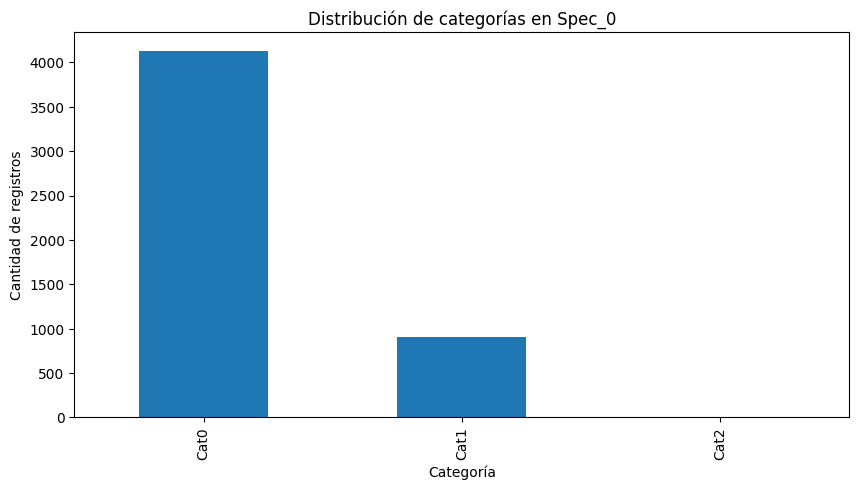

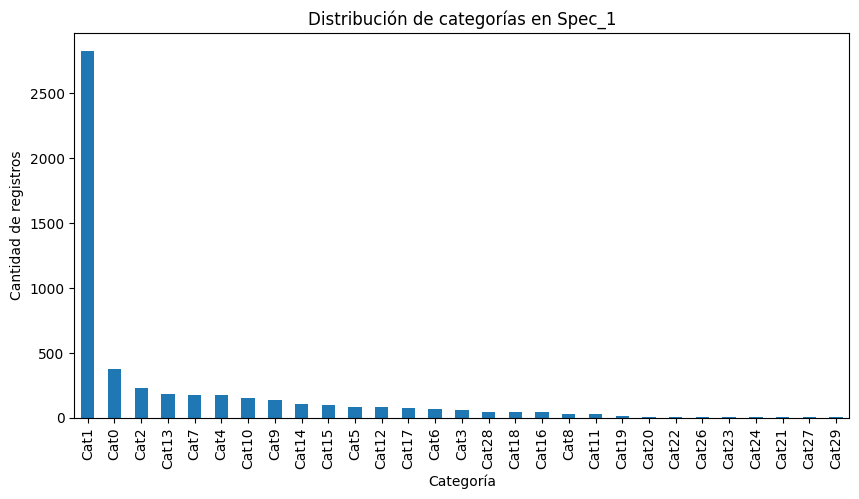

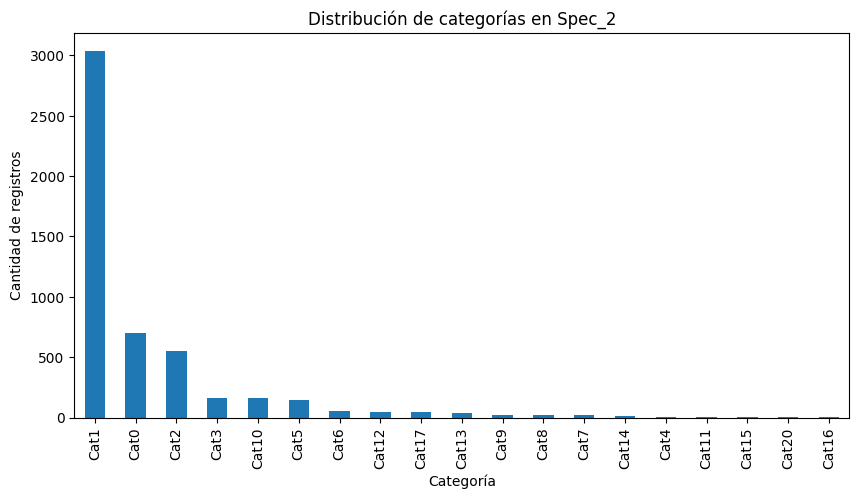

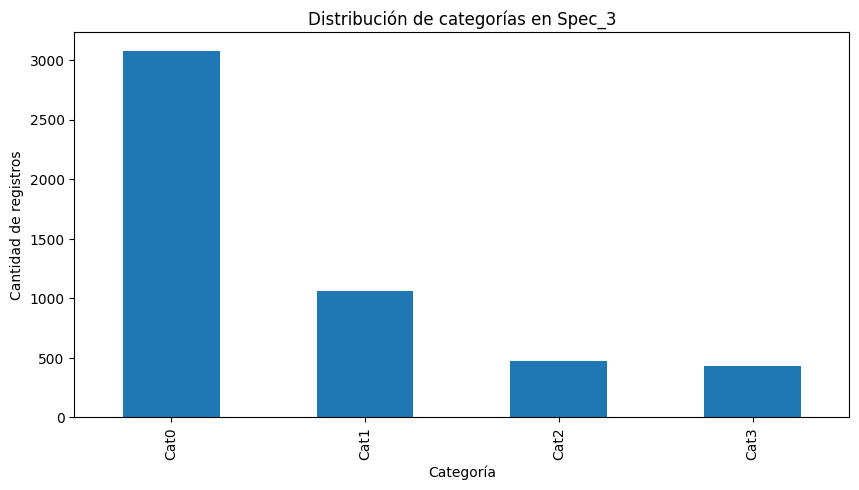

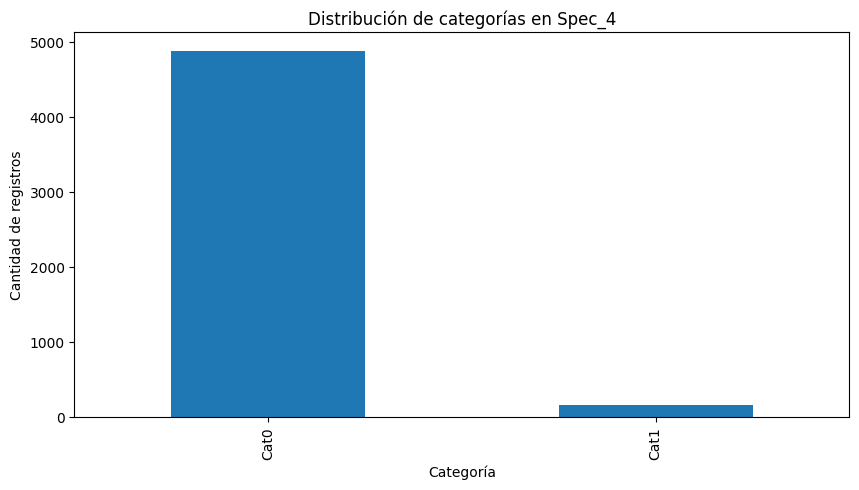

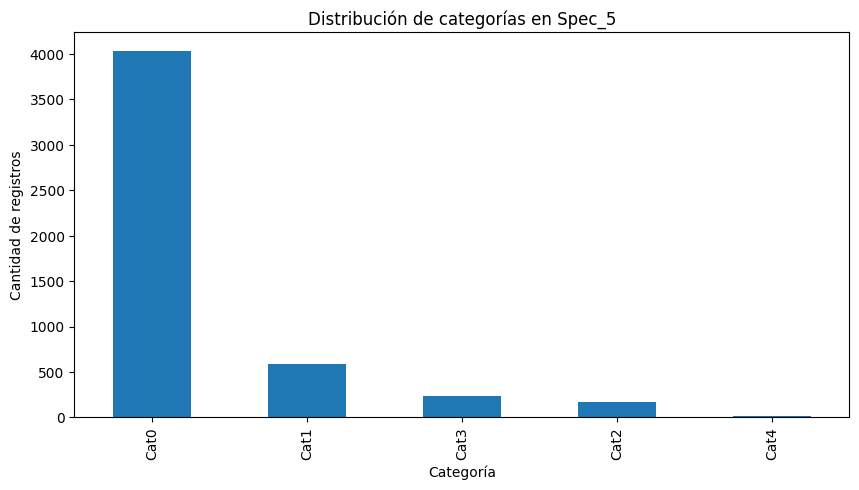

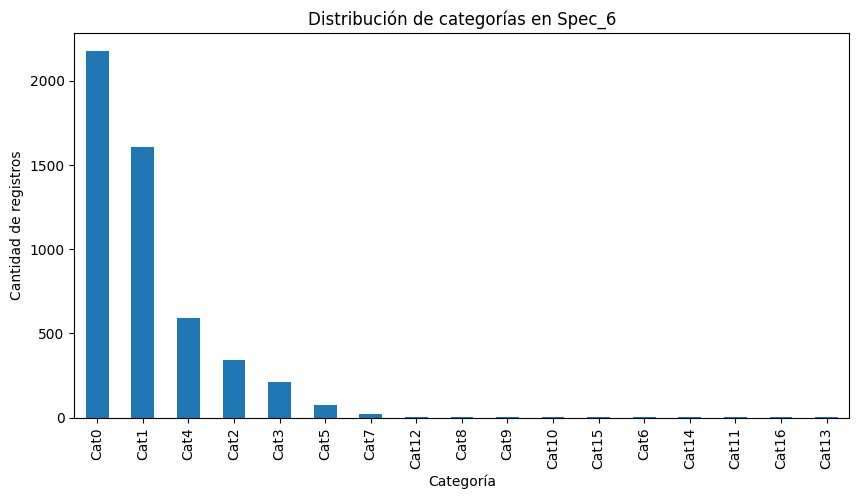

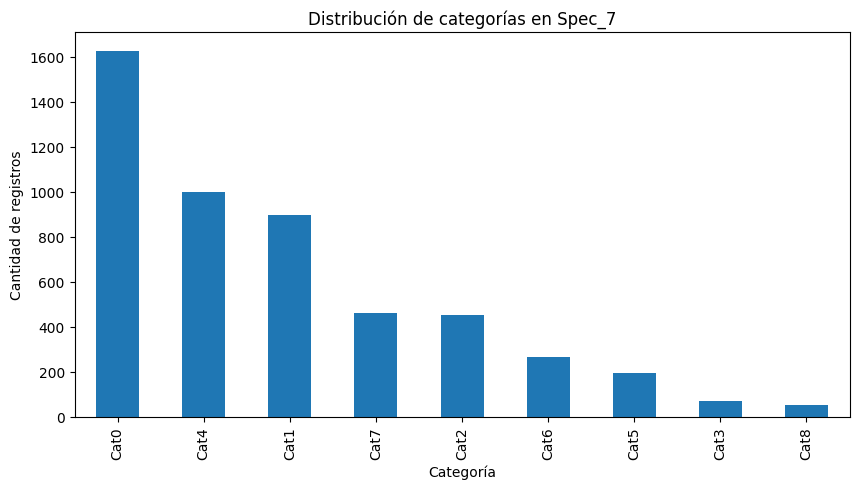

In [42]:
# grafica para ver la frecuencia de cada categoria en cada especificacion tecnica
# seria una grafica de barras para cada columna menos vehicle_id
import matplotlib.pyplot as plt

for column in test_specifications.columns:
    if column != 'vehicle_id':
        plt.figure(figsize=(10, 5))
        # Ordenar de mayor a menor según la frecuencia
        test_specifications[column].value_counts().sort_values(ascending=False).plot(kind='bar')
        plt.title(f'Distribución de categorías en {column}')
        plt.xlabel('Categoría')
        plt.ylabel('Cantidad de registros')
        plt.show()

In [43]:
# por ultimo guardamos esta base de datos limpia en la carpeta data/processed/test
test_specifications.to_csv('../data/processed/test/test_specifications_clean.csv', index=False)